# EDA
Importamos las librerias necesarias para leer datasets y graficar:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Accesos por tecnología

In [3]:
df_axt = pd.read_csv(r"DataSets\Accesos por tecnología.csv", sep = ";")

Vemos si hay valores faltantes en este dataset:

In [4]:
df_axt.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

No hay valores faltantes (Nulos), pasamos a revisar filas duplicadas:

In [5]:
df_axt[df_axt.duplicated(keep = False)]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


No hay filas duplicadas, ahora que ya chequeamos la data podemos pasar a graficar en busca de tendencias y outliers.

Busco outliers en las columnas ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total, mediante Gráficos de dispersión:

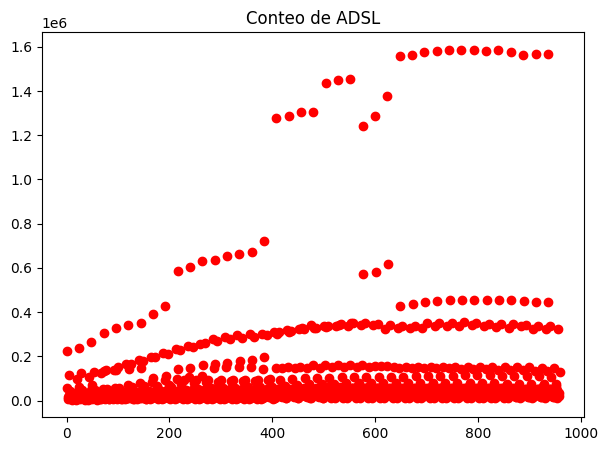

In [6]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["ADSL"], "ro")
plt.title("Conteo de ADSL")
plt.show()

En el grafico podemos ver que hay valores atipicos, aproximadamente 23-24, los vemos mas en detalle: 

In [7]:
df_axt[["Año", "Trimestre", "Provincia", "ADSL"]].sort_values(by = "ADSL",ascending = False).head(25)

,Año,Trimestre,Provincia,ADSL
768,2015,4,Buenos Aires,1586343
792,2015,3,Buenos Aires,1585467
744,2016,1,Buenos Aires,1583560
840,2015,1,Buenos Aires,1583135
816,2015,2,Buenos Aires,1581770
720,2016,2,Buenos Aires,1579448
864,2014,4,Buenos Aires,1575978
696,2016,3,Buenos Aires,1574216
912,2014,2,Buenos Aires,1568881
936,2014,1,Buenos Aires,1567685


Podemos ver que a partir de valor 1241172, la distancia con el siguiente valor que es el 720011, es mucho mas larga. Y a ademas vemos que los valores atipicos, coinciden todos con la provincia de Buenos Aires y que los años entre 2014-2017 son los mas altos. Esto muestra que a lo largo de los años se esta disminuyendo la cantidad de ADSL.

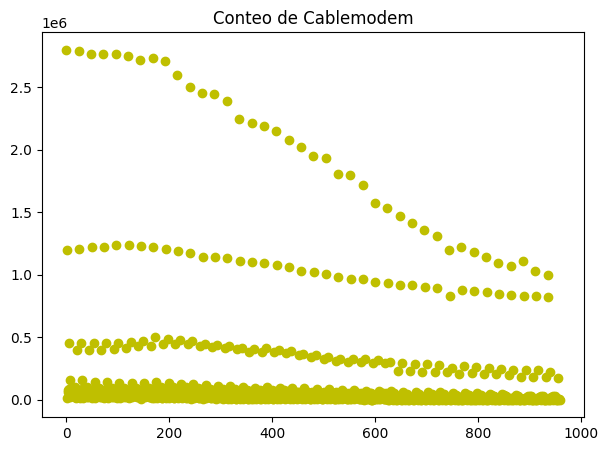

In [8]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["Cablemodem"], "yo")
plt.title("Conteo de Cablemodem")
plt.show()

En este caso no parece haber outliers, ya que los valores crecen de forma pareja y no hay valores muy alejados de los demas

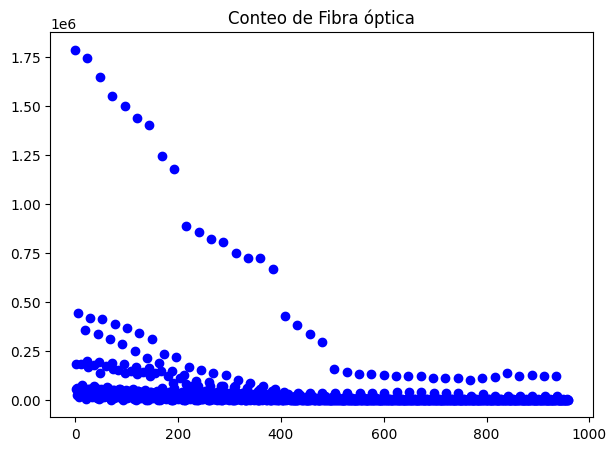

In [9]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["Fibra óptica"], "bo")
plt.title("Conteo de Fibra óptica")
plt.show()

En este caso si hay valores atipicos, los buscamos con mas precicion:

In [10]:
df_axt[["Año", "Trimestre", "Provincia", "Fibra óptica"]].sort_values(by = "Fibra óptica",ascending = False).head(15)

,Año,Trimestre,Provincia,Fibra óptica
0,2023,4,Buenos Aires,1784593
24,2023,3,Buenos Aires,1740239
48,2023,2,Buenos Aires,1645945
72,2023,1,Buenos Aires,1551074
96,2022,4,Buenos Aires,1499149
120,2022,3,Buenos Aires,1436433
144,2022,2,Buenos Aires,1399043
168,2022,1,Buenos Aires,1242121
192,2021,4,Buenos Aires,1176024
216,2021,3,Buenos Aires,885613


De nuevo, podemos ver que la provincia de Buenso Aires tiene valores muy por encima de los demas, esto es lógico debido a su gran diferencia poblacional, mucho mayor que el resto de las provincias. Pero tambien se puede notar que esta ves los outliers se encuentran entre los años 2023-2024. Esto muestra que en los ultimos años se a aumentado la cantidad de fibra óptica.

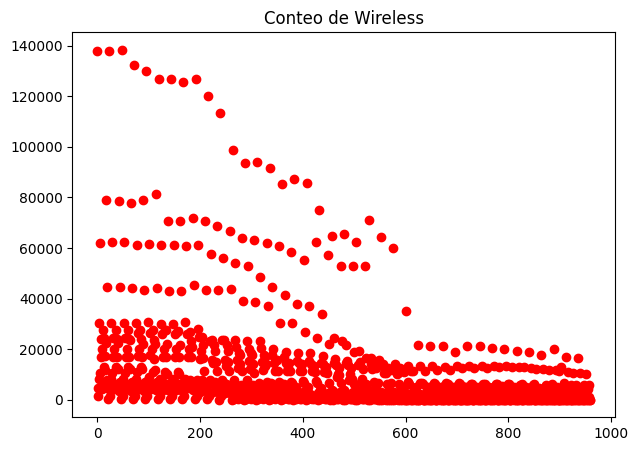

In [11]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["Wireless"], "ro")
plt.title("Conteo de Wireless")
plt.show()

Reviso que tan alejados se encuentran los ultimos 11-12 valores del resto.

In [12]:
df_axt[["Año", "Trimestre", "Provincia", "Wireless"]].sort_values(by = "Wireless",ascending = False).head(13)

,Año,Trimestre,Provincia,Wireless
48,2023,2,Buenos Aires,138405
0,2023,4,Buenos Aires,137993
24,2023,3,Buenos Aires,137921
72,2023,1,Buenos Aires,132458
96,2022,4,Buenos Aires,129910
192,2021,4,Buenos Aires,126887
144,2022,2,Buenos Aires,126847
120,2022,3,Buenos Aires,126846
168,2022,1,Buenos Aires,125521
216,2021,3,Buenos Aires,120228


En este caso yo no los consideraria como outliers, porque no estan muy alejados del resto de los valores. Igual se pude ver como esta creciendo la cantidad de wireless por cada año.

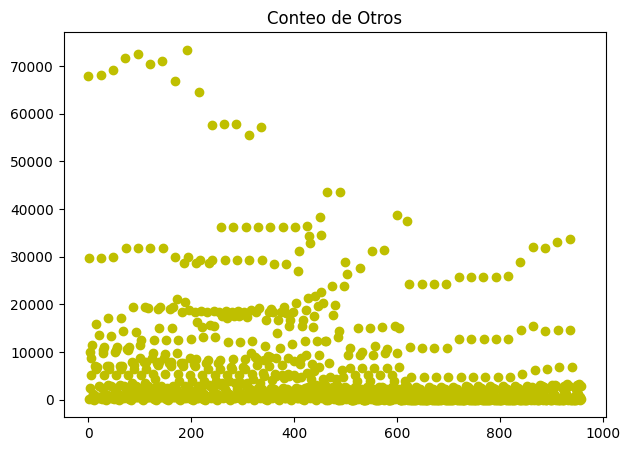

In [13]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["Otros"], "yo")
plt.title("Conteo de Otros")
plt.show()

Busco los primeros 20.

In [53]:
df_axt[["Año", "Trimestre", "Provincia", "Otros"]].sort_values(by = "Otros",ascending = False).head(20)

,Año,Trimestre,Provincia,Otros
192,2021,4,Buenos Aires,73415
96,2022,4,Buenos Aires,72451
72,2023,1,Buenos Aires,71770
144,2022,2,Buenos Aires,71028
120,2022,3,Buenos Aires,70416
48,2023,2,Buenos Aires,69138
24,2023,3,Buenos Aires,68197
0,2023,4,Buenos Aires,67943
168,2022,1,Buenos Aires,66872
216,2021,3,Buenos Aires,64554


En este caso, la distancia si es mucho mayor en proporción a los valores que tenemos, y que a partir de el valor 55541 yo los considero como outliers. Una vez más la provincia de Buenos Aires concentra todos los outliers. En este caso entre los años 2020-2023 va en aumento.

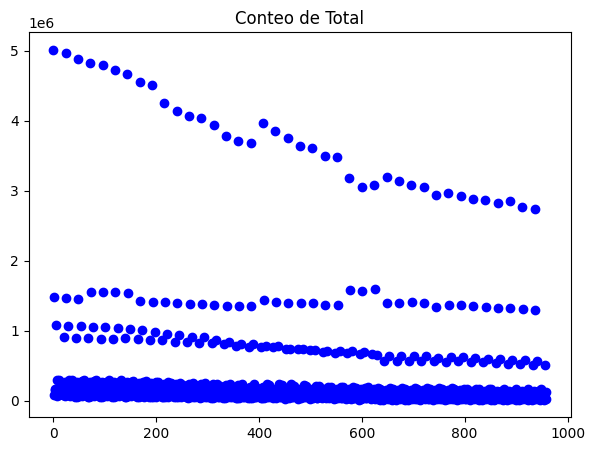

In [15]:
plt.figure(figsize = (7,5))
plt.plot(df_axt["Total"], "bo")
plt.title("Conteo de Total")
plt.show()

Por ultimo, es de esperar que en la columna "todos" encontremos varios outliers, devido a que es la suma de las anteriores (que pueden tener outliers), y no seria de sorprender que estos se encuentren en la provincia de Buenos Aires entre los años 2020-2023. 

In [16]:
df_axt[["Año", "Trimestre", "Provincia", "Total"]].sort_values(by = "Total",ascending = False).head(15)

,Año,Trimestre,Provincia,Total
0,2023,4,Buenos Aires,5011620
24,2023,3,Buenos Aires,4968237
48,2023,2,Buenos Aires,4885488
72,2023,1,Buenos Aires,4820928
96,2022,4,Buenos Aires,4794665
120,2022,3,Buenos Aires,4721668
144,2022,2,Buenos Aires,4667183
168,2022,1,Buenos Aires,4555424
192,2021,4,Buenos Aires,4509157
216,2021,3,Buenos Aires,4251609


Efectivamente se encuentran en la ciudad de Buenos Aires entre los años 2020-2023.

Ahora podriamos ver la cantida porcentual por tipo de servicio, para ver cual es el servicio más relevante:

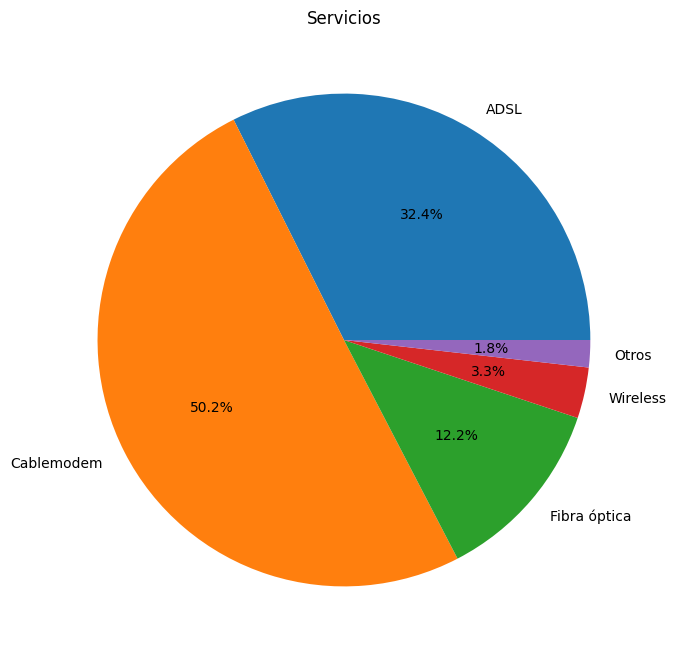

In [92]:
columnas = df_axt[["ADSL","Cablemodem","Fibra óptica","Wireless","Otros"]].sum()
nombres = ["ADSL","Cablemodem","Fibra óptica","Wireless","Otros"]

plt.figure(figsize = (10,8))
plt.pie(columnas, labels = nombres, autopct="%1.1f%%")
plt.title('Servicios')
plt.show()


Los servicios mas relevantes son Cablemodem y ADSL. En este caso se tendria que ver la posibilidad de aumentar la cantidad de Fibra óptica ya que es un servisio mucho mas confiable y brinda una mejor calidad de internet. 

## Accesos por velocidad

In [5]:
df_axv = pd.read_csv(r"DataSets\Accesos por velocidad.csv", sep = ";")

Vemos si hay valores faltantes en este dataset:

In [6]:
df_axv.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Hay 6 nulos en la columna "OTROS", no es una cantidad significativa pero se los tiene que tener en suenta. 

Pasamos a revisar filas duplicadas:

In [45]:
df_axv[df_axv.duplicated(keep = False)]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


No hay filas duplicadas, ahora que ya chequeamos la data podemos pasar a graficar en busca de tendencias y outliers.

Busco outliers en las columnas HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS y Total, mediante Gráficos de dispersión:

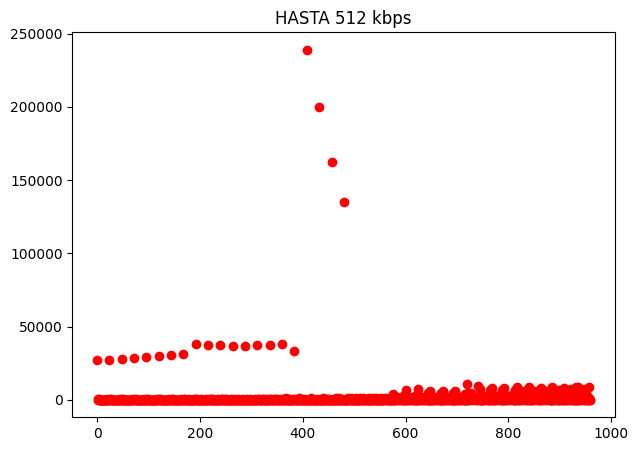

In [48]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["HASTA 512 kbps"], "ro")
plt.title("HASTA 512 kbps")
plt.show()

Podemos ver que hay valores atipicos, los buscamos:

In [52]:
df_axv[["Año", "Trimestre", "Provincia", "HASTA 512 kbps"]].sort_values(by = "HASTA 512 kbps",ascending = False).head(7)

,Año,Trimestre,Provincia,HASTA 512 kbps
408,2019,3,Buenos Aires,238920
432,2019,2,Buenos Aires,199768
456,2019,1,Buenos Aires,162513
480,2018,4,Buenos Aires,134673
360,2020,1,Buenos Aires,38215
192,2021,4,Buenos Aires,37821
336,2020,2,Buenos Aires,37542


Se puede ver que en los años 2018-2019 hubo un aumento de la cantidad de planes con HASTA 512 kbps, pero que en los años siguientes va en decenso.

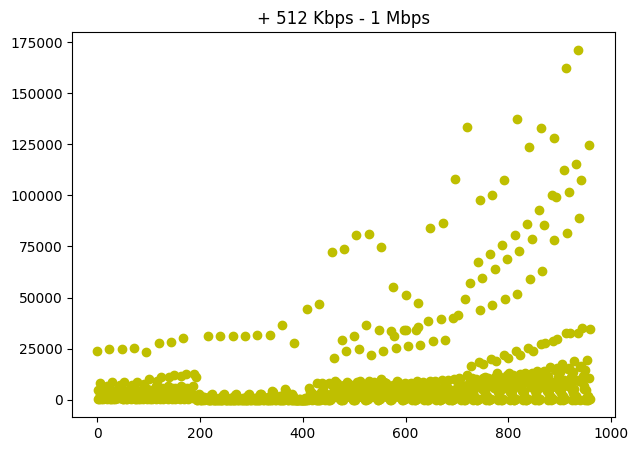

In [55]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 512 Kbps - 1 Mbps"], "yo")
plt.title("+ 512 Kbps - 1 Mbps")
plt.show()

Veo que tan grande es la difirencia con los dos valores mas alejados.

In [58]:
df_axv[["Año", "Trimestre", "Provincia", "+ 512 Kbps - 1 Mbps"]].sort_values(by = "+ 512 Kbps - 1 Mbps",ascending = False).head(5)

,Año,Trimestre,Provincia,+ 512 Kbps - 1 Mbps
936,2014,1,Buenos Aires,171244
912,2014,2,Buenos Aires,162274
816,2015,2,Buenos Aires,137189
720,2016,2,Buenos Aires,133385
864,2014,4,Buenos Aires,132937


Evidentemente los dos primeros si son outliers y estan en el mismo año 2014.

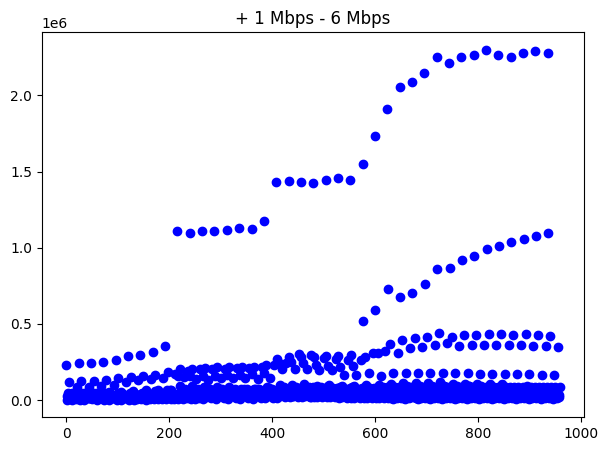

In [64]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 1 Mbps - 6 Mbps"], "bo")
plt.title("+ 1 Mbps - 6 Mbps")
plt.show()

En este caso parecen haver muchos outliers, los buscamos:

In [63]:
df_axv[["Año", "Trimestre", "Provincia", "+ 1 Mbps - 6 Mbps"]].sort_values(by = "+ 1 Mbps - 6 Mbps",ascending = False).head(17)

,Año,Trimestre,Provincia,+ 1 Mbps - 6 Mbps
816,2015,2,Buenos Aires,2299705
912,2014,2,Buenos Aires,2288772
888,2014,3,Buenos Aires,2281524
936,2014,1,Buenos Aires,2279875
840,2015,1,Buenos Aires,2267852
792,2015,3,Buenos Aires,2266948
768,2015,4,Buenos Aires,2253197
720,2016,2,Buenos Aires,2250898
864,2014,4,Buenos Aires,2250445
744,2016,1,Buenos Aires,2214760


Son muchos y rondan los años 2014-2017, esto podria deberse a un traspaso o inversión en otro plan o un situacion economica poblacional diferente.

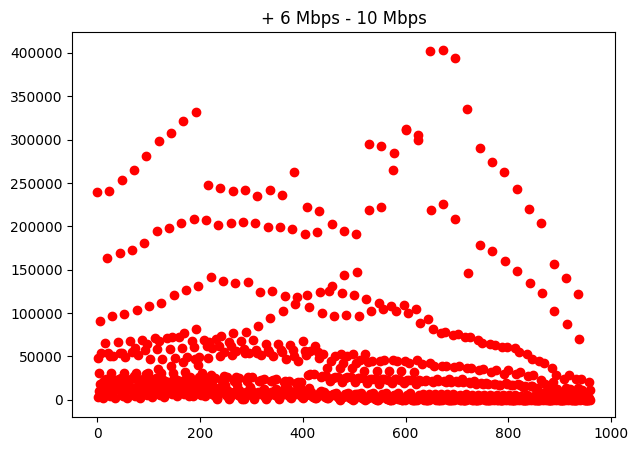

In [65]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 6 Mbps - 10 Mbps"], "ro")
plt.title("+ 6 Mbps - 10 Mbps")
plt.show()

Aca se pude ver que la variación de los datos es mas grande que en las anteriores y parece que hay tres outliers.

In [68]:
df_axv[["Año", "Trimestre", "Provincia", "+ 6 Mbps - 10 Mbps"]].sort_values(by = "+ 6 Mbps - 10 Mbps",ascending = False).head(6)

,Año,Trimestre,Provincia,+ 6 Mbps - 10 Mbps
672,2016,4,Buenos Aires,403575
648,2017,1,Buenos Aires,402315
696,2016,3,Buenos Aires,393530
720,2016,2,Buenos Aires,335296
192,2021,4,Buenos Aires,331292
168,2022,1,Buenos Aires,321756


Estos tres outliers son bastante grandes y estan entre los años 2016-2017 y van decendiendo en los años siguientes.

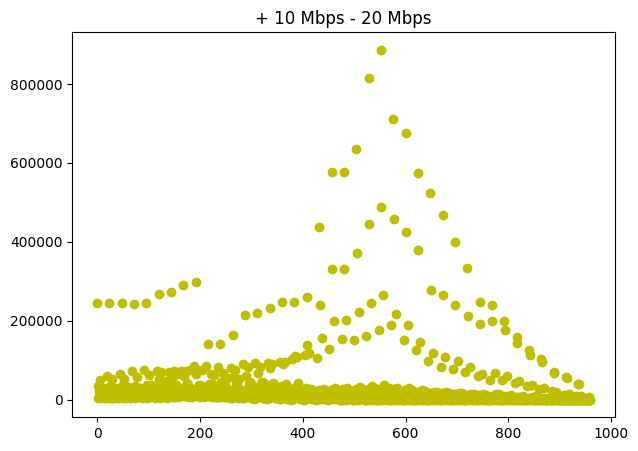

In [70]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 10 Mbps - 20 Mbps"], "yo")
plt.title("+ 10 Mbps - 20 Mbps")
plt.show()

Parece haber aproximadamente 10 outliers.

In [73]:
df_axv[["Año", "Trimestre", "Provincia", "+ 10 Mbps - 20 Mbps"]].sort_values(by = "+ 10 Mbps - 20 Mbps",ascending = False).head(12)

,Año,Trimestre,Provincia,+ 10 Mbps - 20 Mbps
552,2018,1,Buenos Aires,886678
528,2018,2,Buenos Aires,816056
576,2017,4,Buenos Aires,712513
600,2017,3,Buenos Aires,676137
504,2018,3,Buenos Aires,636090
480,2018,4,Buenos Aires,577679
456,2019,1,Buenos Aires,576428
624,2017,2,Buenos Aires,573298
648,2017,1,Buenos Aires,523540
553,2018,1,Capital Federal,487826


Hay 8 outliers los cuales estan entre los años 2017-2019, esto comparado con el grafico anterior puede significar que se aumento el sonsumo de planes con más Mbps.

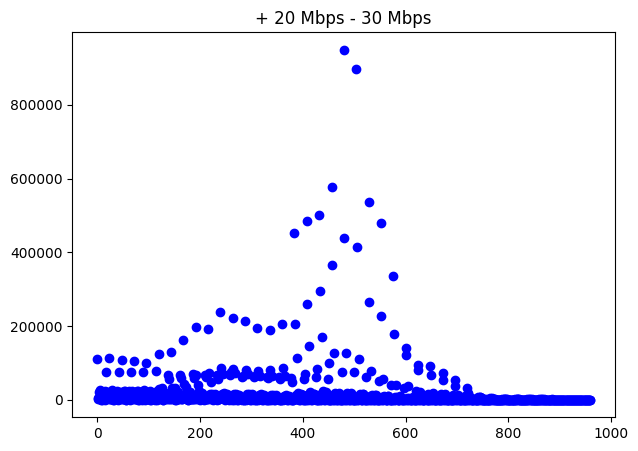

In [74]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 20 Mbps - 30 Mbps"], "bo")
plt.title("+ 20 Mbps - 30 Mbps")
plt.show()

Se ven dos claros outliers.

In [76]:
df_axv[["Año", "Trimestre", "Provincia", "+ 20 Mbps - 30 Mbps"]].sort_values(by = "+ 20 Mbps - 30 Mbps",ascending = False).head(5)

,Año,Trimestre,Provincia,+ 20 Mbps - 30 Mbps
480,2018,4,Buenos Aires,949093
504,2018,3,Buenos Aires,897964
456,2019,1,Buenos Aires,576859
528,2018,2,Buenos Aires,536049
432,2019,2,Buenos Aires,502275


Son dos outliers muy alejados y se encuentran en el año 2018, ademas podemos ver que a medida que aumenta la cantidad de Mbps y el el año, aumenta la cantidad de planes.

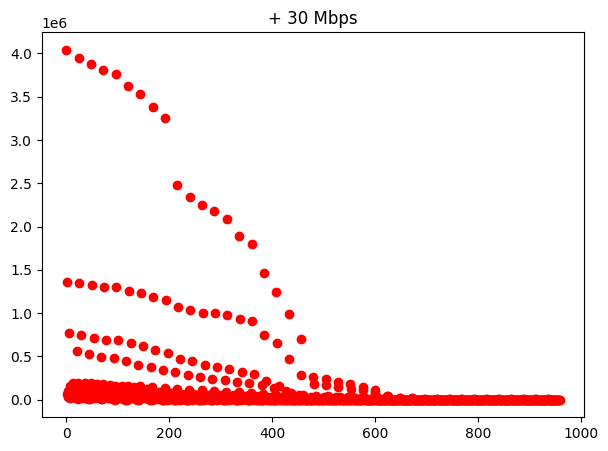

In [77]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["+ 30 Mbps"], "ro")
plt.title("+ 30 Mbps")
plt.show()

En este caso se pude ver que los datos son mas parejos, pero hay outliers.

In [79]:
df_axv[["Año", "Trimestre", "Provincia", "+ 30 Mbps"]].sort_values(by = "+ 30 Mbps",ascending = False).head(13)

,Año,Trimestre,Provincia,+ 30 Mbps
0,2024,4,Buenos Aires,4042646
24,2023,3,Buenos Aires,3951660
48,2023,2,Buenos Aires,3883235
72,2023,1,Buenos Aires,3810940
96,2022,4,Buenos Aires,3760109
120,2022,3,Buenos Aires,3618689
144,2022,2,Buenos Aires,3535757
168,2022,1,Buenos Aires,3381049
192,2021,4,Buenos Aires,3259793
216,2021,3,Buenos Aires,2482266


Se pede ver un gran aumento en los ultimos años (2021-2023), y los datos son mas mucho más grandes que los de la columna + 20 Mbps - 30 Mbps, osea se ve un notable aumento.

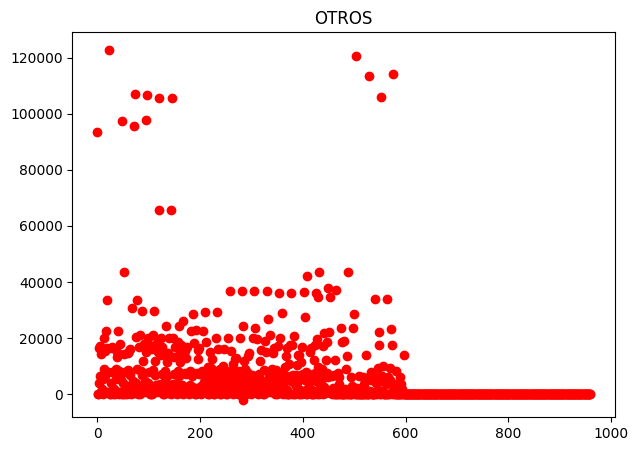

In [80]:
plt.figure(figsize = (7,5))
plt.plot(df_axv["OTROS"], "ro")
plt.title("OTROS")
plt.show()

Se puede ver que los datos estan mucho más concentrados en un lugar específicoy que hay mu pocos valores altos no outliers, ademas de algunos si outliers.

In [81]:
df_axv[["Año", "Trimestre", "Provincia", "OTROS"]].sort_values(by = "OTROS",ascending = False).head(13)

,Año,Trimestre,Provincia,OTROS
24,2023,3,Buenos Aires,122762.0
504,2018,3,Buenos Aires,120464.0
576,2017,4,Buenos Aires,114182.0
528,2018,2,Buenos Aires,113357.0
73,2023,1,Capital Federal,106867.0
97,2022,4,Capital Federal,106772.0
552,2018,1,Buenos Aires,105818.0
145,2022,2,Capital Federal,105607.0
121,2022,3,Capital Federal,105477.0
96,2022,4,Buenos Aires,97634.0


En este caso los valores outliers se encuentran entre los años 2017-2023. Pero son mas bajos que los de las columnas anteriores, esto puede deverse, a que se pude tratar de un plan más dirigido para empresas o clientes con mayor poder adquisitivo.

Ahora podriamos ver la cantida porcentual por tipo de plan, para ver cual es el plan más relevante:

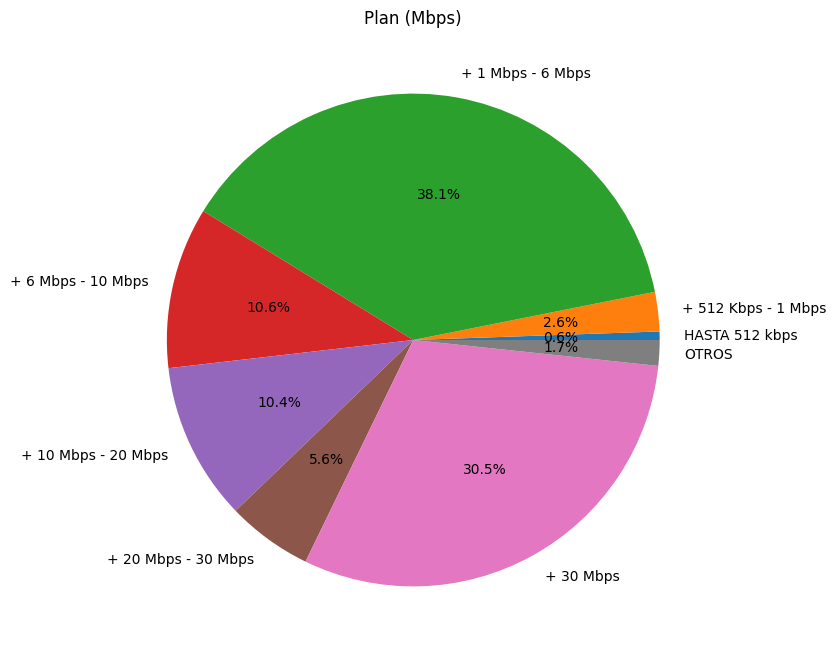

In [94]:
columnas = df_axv[["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]].sum()
nombres = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]


plt.figure(figsize = (10,8))
plt.pie(columnas, labels= nombres, autopct="%1.1f%%")
plt.title('Plan (Mbps)')
plt.show()